# XVII Jornadas de Internacionalización, República Oriental del Uruguay
## Técnicas Básicas de Máquinas de Aprendizaje en Teledetección

### Ejemplos de Clasificación de imágenes hiperespectrales
### **Autor:** Dr. Juan Marcos Ramírez Rondón
### 12 de Mayo de 2021

In [1]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd "/content/gdrive/My Drive/Colab Notebooks/UDI_May2021"
%ls

/content/gdrive/My Drive/Colab Notebooks/UDI_May2021
Data/                KNN.ipynb    pca_classmap.png  RF.ipynb
hyperimgclasspkg.py  KRN.ipynb    PCA.ipynb         SVM.ipynb
img_classmap.png     NLSVM.ipynb  __pycache__/


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import hyperimgclasspkg as hiclass

# Cargar datos

In [4]:
# Carga la image Pavia University de tamaño 256 x 256

data_path    = os.path.join(os.getcwd(),'Data')
Io           = sio.loadmat(os.path.join(data_path, 'PaviaU.mat'))['paviaU']
Io           = Io[354:610,0:256,0:96]
M, N, L      = Io.shape

ground_truth = sio.loadmat(os.path.join(data_path, 'PaviaU_gt.mat'))['paviaU_gt']
ground_truth = ground_truth[354:610,0:256]

# Ajuste del ground truth o golden model
for i in range(0,M):
    for j in range(0,N):
        if (ground_truth[i,j] > 5):
            ground_truth[i,j] = ground_truth[i,j] - 1

# Crear los datos de entrenamiento y los datos de prueba

In [5]:
# Generar de forma aleatoria los indices de entrenamiento y los indices de prueba
# 10% muestras de entrenamiento, 90% muestras de prueba
trn_ind, tst_ind, num_trn, num_tst = hiclass.class_indices(ground_truth, 0.10)

Y_gtm  = ground_truth.reshape(M*N)
Y_trn  = Y_gtm[trn_ind]
Y_tst  = Y_gtm[tst_ind]

X_ftr  = Io.reshape(M*N, L)
X_trn  = X_ftr[trn_ind,:]
X_tst  = X_ftr[tst_ind,:]

pca = PCA(n_components = 8)
X_pca = pca.fit_transform(X_ftr)
X_pca_trn  = X_pca[trn_ind,:]
X_pca_tst  = X_pca[tst_ind,:]

# Etapa de clasificación y cálculo de precisión

In [6]:
# IMAGEN COMPLETA

####################################
# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_trn, Y_trn)
Y_knn = knn.predict(X_tst)
OA_knn, AA_knn, KP_knn, AC_knn = hiclass.compute_accuracy(Y_tst, Y_knn)

####################################
# RF
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_trn, Y_trn)
Y_rfc = rfc.predict(X_tst)
OA_rfc, AA_rfc, KP_rfc, AC_rfc = hiclass.compute_accuracy(Y_tst, Y_rfc)

####################################
# SVM
svm = Pipeline([("scaler", StandardScaler()),
                ("linear_svc", LinearSVC(C=1, loss="hinge"))
                ])
svm.fit(X_trn, Y_trn)
Y_svm = svm.predict(X_tst)
OA_svm, AA_svm, KP_svm, AC_svm = hiclass.compute_accuracy(Y_tst, Y_svm)

####################################
# SVM-PLY
ply = Pipeline([("scaler", StandardScaler()),
                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=1))
                ])
ply.fit(X_trn, Y_trn)
Y_ply = ply.predict(X_tst)
OA_ply, AA_ply, KP_ply, AC_ply = hiclass.compute_accuracy(Y_tst, Y_ply)

####################################
# SVM-RBF
rbf = Pipeline([("scaler", StandardScaler()),
                ("svm_clf", SVC(kernel="rbf", gamma=1, C=0.001))
                ])
rbf.fit(X_trn, Y_trn)
Y_rbf = rbf.predict(X_tst)
OA_rbf, AA_rbf, KP_rbf, AC_rbf = hiclass.compute_accuracy(Y_tst, Y_rbf)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Mostrar los mapas etiquetados

Text(0.5, 1.0, 'Kernel RBF. OA: 62.14')

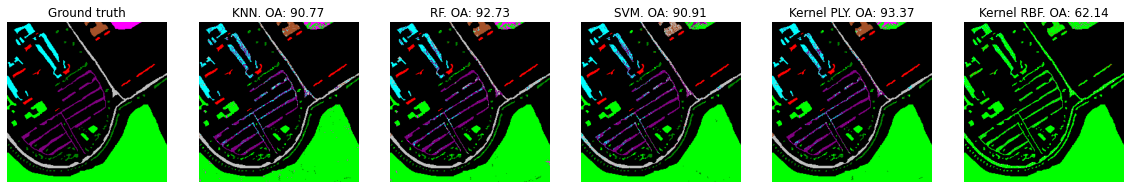

In [7]:
# Ground truth
gtm_img = hiclass.label2color_py(ground_truth,'paviaU')

# Mapa de Clasificación
lbl_knn = np.zeros(M*N, dtype=int)
lbl_knn[trn_ind] = Y_trn
lbl_knn[tst_ind] = Y_knn
knn_img = hiclass.label2color_py(lbl_knn.reshape(M,N),'paviaU')

# Mapa de Clasificación
lbl_rfc = np.zeros(M*N, dtype=int)
lbl_rfc[trn_ind] = Y_trn
lbl_rfc[tst_ind] = Y_rfc
rfc_img = hiclass.label2color_py(lbl_rfc.reshape(M,N),'paviaU')

# Mapa de Clasificación
lbl_svm = np.zeros(M*N, dtype=int)
lbl_svm[trn_ind] = Y_trn
lbl_svm[tst_ind] = Y_svm
svm_img = hiclass.label2color_py(lbl_svm.reshape(M,N),'paviaU')

# Mapa de Clasificación
lbl_ply = np.zeros(M*N, dtype=int)
lbl_ply[trn_ind] = Y_trn
lbl_ply[tst_ind] = Y_ply
ply_img = hiclass.label2color_py(lbl_ply.reshape(M,N),'paviaU')

# Mapa de Clasificación
lbl_rbf = np.zeros(M*N, dtype=int)
lbl_rbf[trn_ind] = Y_trn
lbl_rbf[tst_ind] = Y_rbf
rbf_img = hiclass.label2color_py(lbl_rbf.reshape(M,N),'paviaU')

fig, axs = plt.subplots(1,6)
fig.set_size_inches(20, 20)

axs[0].imshow(gtm_img)
axs[0].axis('off')
axs[0].set_title("Ground truth")
axs[1].imshow(knn_img)
axs[1].axis('off')
axs[1].set_title("KNN. OA: %.2f"%(OA_knn*100))
axs[2].imshow(rfc_img)
axs[2].axis('off')
axs[2].set_title("RF. OA: %.2f"%(OA_rfc*100))
axs[3].imshow(svm_img)
axs[3].axis('off')
axs[3].set_title("SVM. OA: %.2f"%(OA_svm*100))
axs[4].imshow(ply_img)
axs[4].axis('off')
axs[4].set_title("Kernel PLY. OA: %.2f"%(OA_ply*100))
axs[5].imshow(rbf_img)
axs[5].axis('off')
axs[5].set_title("Kernel RBF. OA: %.2f"%(OA_rbf*100))

# plt.savefig('img_classmap.png')

In [8]:
# IMAGEN PCA

####################################
# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_pca_trn, Y_trn)
Y_knn = knn.predict(X_pca_tst)
OA_knn, AA_knn, KP_knn, AC_knn = hiclass.compute_accuracy(Y_tst, Y_knn)

####################################
# RF
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_pca_trn, Y_trn)
Y_rfc = rfc.predict(X_pca_tst)
OA_rfc, AA_rfc, KP_rfc, AC_rfc = hiclass.compute_accuracy(Y_tst, Y_rfc)

####################################
# SVM
svm = Pipeline([("scaler", StandardScaler()),
                ("linear_svc", LinearSVC(C=1, loss="hinge"))
                ])
svm.fit(X_pca_trn, Y_trn)
Y_svm = svm.predict(X_pca_tst)
OA_svm, AA_svm, KP_svm, AC_svm = hiclass.compute_accuracy(Y_tst, Y_svm)

####################################
# SVM-PLY
ply = Pipeline([("scaler", StandardScaler()),
                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=1))
                ])
ply.fit(X_pca_trn, Y_trn)
Y_ply = ply.predict(X_pca_tst)
OA_ply, AA_ply, KP_ply, AC_ply = hiclass.compute_accuracy(Y_tst, Y_ply)

####################################
# SVM-RBF
rbf = Pipeline([("scaler", StandardScaler()),
                ("svm_clf", SVC(kernel="rbf", gamma=1, C=0.001))
                ])
rbf.fit(X_pca_trn, Y_trn)
Y_rbf = rbf.predict(X_pca_tst)
OA_rbf, AA_rbf, KP_rbf, AC_rbf = hiclass.compute_accuracy(Y_tst, Y_rbf)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 1.0, 'Kernel RBF. OA: 62.14')

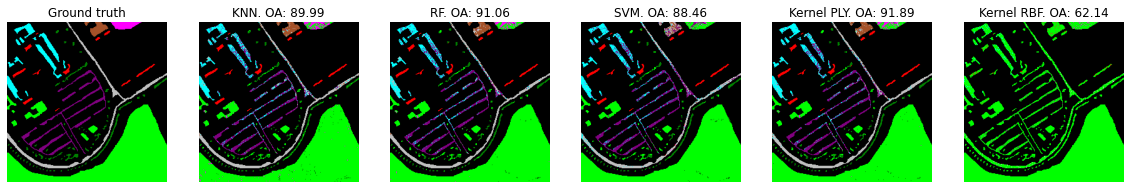

In [9]:
# Ground truth
gtm_img = hiclass.label2color_py(ground_truth,'paviaU')

# Mapa de Clasificación
lbl_knn = np.zeros(M*N, dtype=int)
lbl_knn[trn_ind] = Y_trn
lbl_knn[tst_ind] = Y_knn
knn_img = hiclass.label2color_py(lbl_knn.reshape(M,N),'paviaU')

# Mapa de Clasificación
lbl_rfc = np.zeros(M*N, dtype=int)
lbl_rfc[trn_ind] = Y_trn
lbl_rfc[tst_ind] = Y_rfc
rfc_img = hiclass.label2color_py(lbl_rfc.reshape(M,N),'paviaU')

# Mapa de Clasificación
lbl_svm = np.zeros(M*N, dtype=int)
lbl_svm[trn_ind] = Y_trn
lbl_svm[tst_ind] = Y_svm
svm_img = hiclass.label2color_py(lbl_svm.reshape(M,N),'paviaU')

# Mapa de Clasificación
lbl_ply = np.zeros(M*N, dtype=int)
lbl_ply[trn_ind] = Y_trn
lbl_ply[tst_ind] = Y_ply
ply_img = hiclass.label2color_py(lbl_ply.reshape(M,N),'paviaU')

# Mapa de Clasificación
lbl_rbf = np.zeros(M*N, dtype=int)
lbl_rbf[trn_ind] = Y_trn
lbl_rbf[tst_ind] = Y_rbf
rbf_img = hiclass.label2color_py(lbl_rbf.reshape(M,N),'paviaU')

fig, axs = plt.subplots(1,6)
fig.set_size_inches(20, 20)

axs[0].imshow(gtm_img)
axs[0].axis('off')
axs[0].set_title("Ground truth")
axs[1].imshow(knn_img)
axs[1].axis('off')
axs[1].set_title("KNN. OA: %.2f"%(OA_knn*100))
axs[2].imshow(rfc_img)
axs[2].axis('off')
axs[2].set_title("RF. OA: %.2f"%(OA_rfc*100))
axs[3].imshow(svm_img)
axs[3].axis('off')
axs[3].set_title("SVM. OA: %.2f"%(OA_svm*100))
axs[4].imshow(ply_img)
axs[4].axis('off')
axs[4].set_title("Kernel PLY. OA: %.2f"%(OA_ply*100))
axs[5].imshow(rbf_img)
axs[5].axis('off')
axs[5].set_title("Kernel RBF. OA: %.2f"%(OA_rbf*100))

# plt.savefig('pca_classmap.png')